# 5章 Pythonによる科学計算（NumpyとScipy）
# 5-1 概要と事前準備
## 5-1-1 この章の概要
## 5-1-2 この章で使うライブラリのインポート

In [275]:
import numpy as np
import numpy.random as random
import scipy as sp

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
%precision 3

'%.3f'

# 5-2 Numpyを使用した計算の応用
## 5-2-1 インデックス参照

In [276]:
sample_array = np.arange(10)
print('sample_array:', sample_array)

sample_array: [0 1 2 3 4 5 6 7 8 9]


In [277]:
print(sample_array)
# 前から数字を5つ取得して、sample_array_sliceに入れる（スライス）
sample_array_slice = sample_array[0:5]
print(sample_array_slice)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]


In [278]:
# sample_arrayの前から3文字目までは10で置換
sample_array_slice[0:3] = 10
print(sample_array_slice)

# スライスの変更はオリジナルのリストも変更されている！（同じメモリ領域を参照してる）
print(sample_array)

[10 10 10  3  4]
[10 10 10  3  4  5  6  7  8  9]


### 1-1 データのコピー

In [279]:
# copyして別のobjectを作成
sample_array_copy = np.copy(sample_array)
print(sample_array_copy)

sample_array_copy[0:3] = 20
print(sample_array_copy)

# copyでは元のリストの要素は変更されない（別のメモリ領域を参照）
print(sample_array)

[10 10 10  3  4  5  6  7  8  9]
[20 20 20  3  4  5  6  7  8  9]
[10 10 10  3  4  5  6  7  8  9]


In [280]:
# データの準備
sample_names = np.array(['a', 'b', 'c', 'd', 'a'])
random.seed(0)
data = random.randn(5,5)

print(sample_names)
print(data)

['a' 'b' 'c' 'd' 'a']
[[ 1.764  0.4    0.979  2.241  1.868]
 [-0.977  0.95  -0.151 -0.103  0.411]
 [ 0.144  1.454  0.761  0.122  0.444]
 [ 0.334  1.494 -0.205  0.313 -0.854]
 [-2.553  0.654  0.864 -0.742  2.27 ]]


In [281]:
sample_names == 'a'

array([ True, False, False, False,  True])

In [282]:
# trueとなる0番目と4番目の要素（今回は二次元配列なので0,4列が取り出される）
data[sample_names == 'a']

array([[ 1.764,  0.4  ,  0.979,  2.241,  1.868],
       [-2.553,  0.654,  0.864, -0.742,  2.27 ]])

### 1-3 条件制御

In [283]:
# 条件制御のためのブール配列を作成
cond_data = np.array([True, False, False, False, True])

# 配列x_arrayを作成
x_array = np.array([1,2,3,4,5])

# 配列y_arrayを作成
y_array = np.array([100,200,300,400,500])

#条件制御実施（TrueだとXのデータ、Falseの時はYのデータが取り出される）
print(np.where(cond_data, x_array, y_array))

[  1 200 300 400   5]


## 練習問題 5-1 

In [284]:
data[sample_names == 'b']

array([[-0.977,  0.95 , -0.151, -0.103,  0.411]])

In [285]:
data[sample_names != 'c']

array([[ 1.764,  0.4  ,  0.979,  2.241,  1.868],
       [-0.977,  0.95 , -0.151, -0.103,  0.411],
       [ 0.334,  1.494, -0.205,  0.313, -0.854],
       [-2.553,  0.654,  0.864, -0.742,  2.27 ]])

## 練習問題5-3

In [286]:
x_array = np.array([1,2,3,4,5])
y_array = np.array([6,7,8,9,10])
z_array = np.array([False, False, True, True, False])
print(np.where(z_array, x_array, y_array))

[ 6  7  3  4 10]


## 5-2-2 Numpyの演算処理
### 2-1 重複の削除

In [287]:
cond_data = np.array([True, True, False, False, True])
print(cond_data)
#重複削除
print(np.unique(cond_data))

[ True  True False False  True]
[False  True]


### 2-2 ユニバーサル関数

In [288]:
sample_data = np.arange(10)
print('元のデータ:', sample_data)
print('すべての要素の平方根:', np.sqrt(sample_data))
print('すべての要素のネイピア指数関数:', np.exp(sample_data))

元のデータ: [0 1 2 3 4 5 6 7 8 9]
すべての要素の平方根: [0.    1.    1.414 1.732 2.    2.236 2.449 2.646 2.828 3.   ]
すべての要素のネイピア指数関数: [1.000e+00 2.718e+00 7.389e+00 2.009e+01 5.460e+01 1.484e+02 4.034e+02
 1.097e+03 2.981e+03 8.103e+03]


### 2-3 最小、最大、平均、合計の計算

In [289]:
# arangeで9つの要素を持つ配列を生成。reshapeで(3,3)の行列に再形成
sample_multi_array_data1 = np.arange(9).reshape(3,3)
print(sample_multi_array_data1)
print('最小値：', sample_multi_array_data1.min())
print('最大値：', sample_multi_array_data1.max())
print('平均：', sample_multi_array_data1.mean())
print('合計：', sample_multi_array_data1.sum())

# 行列を指定して合計値を求める
print('行の合計:', sample_multi_array_data1.sum(axis=1))
print('列の合計:', sample_multi_array_data1.sum(axis=0))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
最小値： 0
最大値： 8
平均： 4.0
合計： 36
行の合計: [ 3 12 21]
列の合計: [ 9 12 15]


### 2-4　真偽値の判定

In [290]:
cond_data = np.array([True, False, False, False, True])

print('Trueが少なくとも1つあるか:', cond_data.any())
print('すべてTrueか:', cond_data.all())

Trueが少なくとも1つあるか: True
すべてTrueか: False


In [291]:
# 条件を指定してからsum関数などを適用することも可能
print('5より大きな値がいくつあるか:', (sample_multi_array_data1 > 5).sum())

5より大きな値がいくつあるか: 3


### 2-5 対角成分の計算

In [292]:
# 行列計算
sample_multi_array_data1 = np.arange(9).reshape(3,3)
print(sample_multi_array_data1)
print('対角成分：', np.diag(sample_multi_array_data1))
print('対角成分の和：', np.trace(sample_multi_array_data1))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
対角成分： [0 4 8]
対角成分の和： 12


### 練習問題 5-4

In [293]:
sample_multi_array_data2 = np.arange(16).reshape(4,4)
sample_multi_array_data2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [294]:
print(np.sqrt(sample_multi_array_data2))

[[0.    1.    1.414 1.732]
 [2.    2.236 2.449 2.646]
 [2.828 3.    3.162 3.317]
 [3.464 3.606 3.742 3.873]]


### 練習問題 5-5

In [295]:
print('最小値：', sample_multi_array_data2.min())
print('最大値：', sample_multi_array_data2.max())
print('平均：', sample_multi_array_data2.mean())
print('合計：', sample_multi_array_data2.sum())

最小値： 0
最大値： 15
平均： 7.5
合計： 120


### 練習問題 5-6

In [296]:
print('対角成分の和：', np.trace(sample_multi_array_data2))

対角成分の和： 30


## 5-2-3 配列操作とブロードキャスト
### 3-1 再形成

In [297]:
sample_array = np.arange(10)
sample_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [298]:
#再形成
sample_array2 = sample_array.reshape(2,5)
sample_array2

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [299]:
sample_array2.reshape(5,2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [300]:
### 3-2 データの結合

In [301]:
sample_array3 = np.array([[1,2,3],[4,5,6]])
sample_array3

array([[1, 2, 3],
       [4, 5, 6]])

In [302]:
sample_array4 = np.array([[7,8,9],[10,11,12]])
sample_array4

array([[ 7,  8,  9],
       [10, 11, 12]])

In [303]:
np.concatenate([sample_array3, sample_array4], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [304]:
# 行方向の結合の別の方法
np.vstack((sample_array3, sample_array4))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [305]:
np.concatenate([sample_array3, sample_array4], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [306]:
# 列方向の結合の別の方法
np.hstack((sample_array3, sample_array4))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

### 3-3 配列の分割

In [307]:
sample_array3 = np.array([[1,2,3],[4,5,6]])
sample_array4 = np.array([[7,8,9],[10,11,12]])
sample_array_vstack = np.vstack((sample_array3, sample_array4))
sample_array_vstack

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [308]:
# 3つに分割し、それぞれ変数に代入
first, second, third = np.split(sample_array_vstack, [1,3])

print(first)

[[1 2 3]]


In [309]:
print(second)

[[4 5 6]
 [7 8 9]]


In [310]:
print(third)

[[10 11 12]]


In [311]:
sample_array5 = np.array([[13,14,15],[16,17,18], [19, 20, 21]])
sample_array_vstack2 = np.vstack((sample_array3, sample_array4, sample_array5))
sample_array_vstack2

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18],
       [19, 20, 21]])

In [312]:
# -2,2,3-4,5-と4つに分割
first, second, third, fourth = np.split(sample_array_vstack2, [2,3,5])
print('1つ目:\n',first,'\n')
print('2つ目:\n',second,'\n')
print('3つ目:\n',third,'\n')
print('4つ目:\n',fourth,'\n')

1つ目:
 [[1 2 3]
 [4 5 6]] 

2つ目:
 [[7 8 9]] 

3つ目:
 [[10 11 12]
 [13 14 15]] 

4つ目:
 [[16 17 18]
 [19 20 21]] 



### 3-4 繰り返し処理

In [313]:
first.repeat(5)

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 6, 6, 6, 6, 6])

### 3-5 ブロードキャスト

In [314]:
sample_array = np.arange(10)
sample_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [315]:
sample_array + 3

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### 練習問題 5-7 リストの結合（縦向き）

In [316]:
sample_array1 = np.arange(12).reshape(3,4)
sample_array2 = np.arange(12).reshape(3,4)
sample_array3 = np.concatenate((sample_array1, sample_array2), axis=0)
sample_array3

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### 練習問題 5-8 リストの結合（横向き）

In [317]:
sample_array4 = np.concatenate((sample_array1, sample_array2), axis=1)
sample_array4

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

### 練習問題 5-9 リストの全要素への足し算（ブロードキャスト）

In [318]:
sample_list = [1,2,3,4,5]
sample_array10 = np.array(sample_list) + 3
sample_array10

array([4, 5, 6, 7, 8])

# 5-3 Scipyを使った計算の応用
## 5-3-1 補間

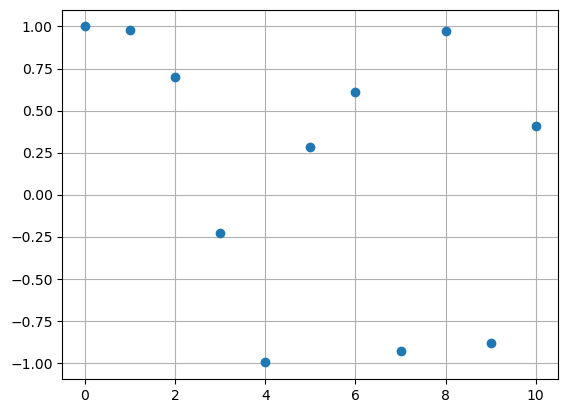

In [319]:
# linespaceで0-10、要素11の等間隔数列の生成
x = np.linspace(0,10,num=11,endpoint=True)
y  = np.cos(-x ** 2 / 5.0)
plt.plot(x,y,'o')
plt.grid(True)

### 1-1 線形補間

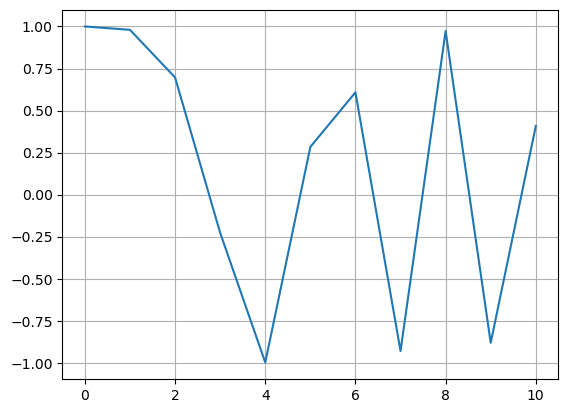

In [320]:
from scipy import interpolate

f = interpolate.interp1d(x,y,'linear')
plt.plot(x, f(x), '-')
plt.grid(True)

### 1-2 スプライン3次補間

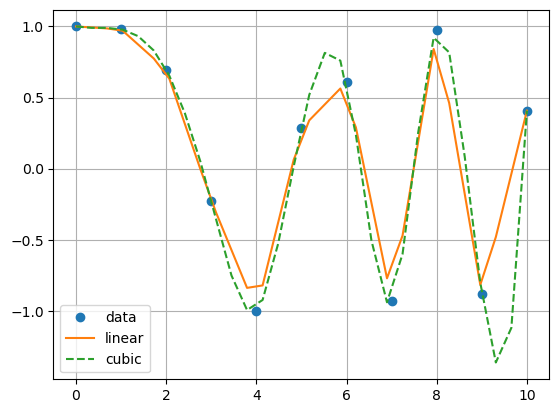

In [321]:
# スプライン3次補間を計算してf2として追加する。パラメータに"cubic"を指定する
f2 = interpolate.interp1d(x,y,'cubic')
# 曲線を出すために、xの値を細かくする
xnew = np.linspace(0,10,num=30,endpoint=True)
# グラフ化。fを直線で描き、f2を点線で描く。
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
# 凡例
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.grid(True)

### 練習問題 5-10 線形補間

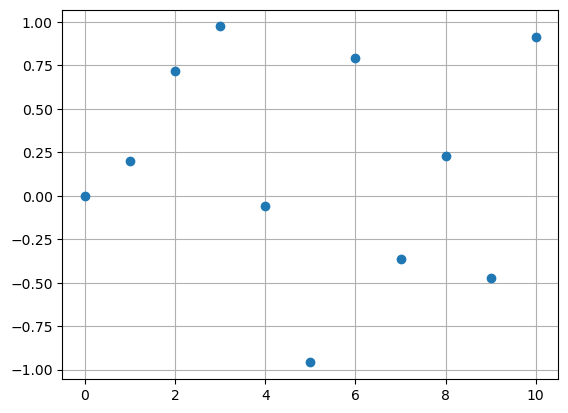

In [322]:
# linespaceで0-10、要素11の等間隔数列の生成
x = np.linspace(0,10,num=11,endpoint=True)
y  = np.sin(x ** 2 / 5.0)
plt.plot(x,y,'o')
plt.grid(True)

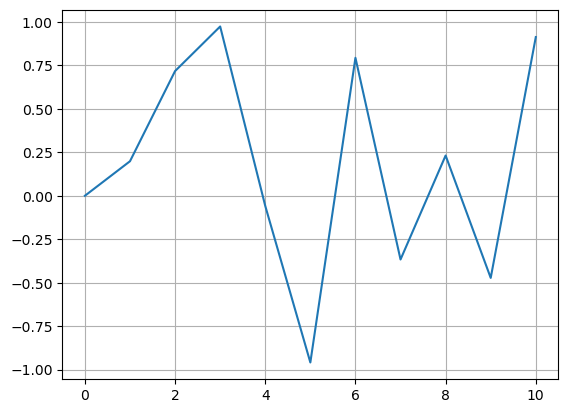

In [323]:
from scipy import interpolate

f = interpolate.interp1d(x,y,'linear')
plt.plot(x, f(x), '-')
plt.grid(True)

### 練習問題 5-11 スプライン2次元補間

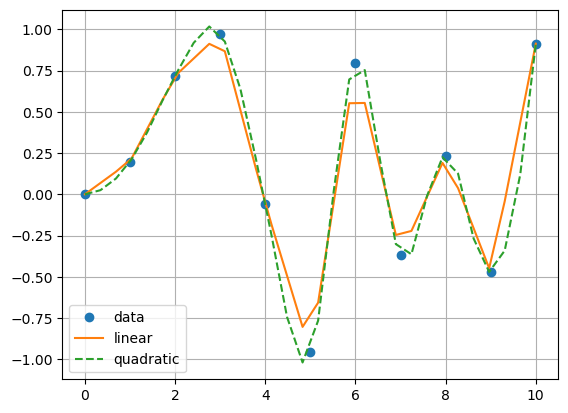

In [324]:
# スプライン2次補間を計算してf12として追加する。パラメータに"quadratic"を指定する
f12 = interpolate.interp1d(x,y,'quadratic')
# 曲線を出すために、xの値を細かくする
xnew = np.linspace(0,10,num=30,endpoint=True)
# グラフ化。fを直線で描き、f2を点線で描く。
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f12(xnew), '--')
# 凡例
plt.legend(['data', 'linear', 'quadratic'], loc='best')
plt.grid(True)

### 練習問題 5-12 スプライン3次補間

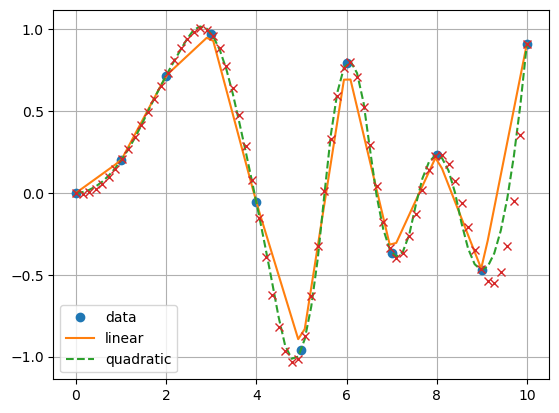

In [325]:
# スプライン3次補間を計算してf13として追加する。パラメータに"cubic"を指定する
f13 = interpolate.interp1d(x,y,'cubic')
# スプライン2次補間を計算してf12として追加する。パラメータに"quadratic"を指定する
f12 = interpolate.interp1d(x,y,'quadratic')
# 曲線を出すために、xの値を細かくする
xnew = np.linspace(0,10,num=70,endpoint=True)
# グラフ化。fを直線で描き、f2を点線で描く。
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f12(xnew), '--', xnew, f13(xnew), 'x')
# 凡例
plt.legend(['data', 'linear', 'quadratic'], loc='best')
plt.grid(True)

## 5-3-2 線形代数：行列の分解
### 2-1 特異値分解（SVD : singler value decompostion）
機械学習の章で学ぶリッジ回帰や主成分分析などと関係している。深層学習を学ぶ上でも重要。

In [329]:
# {2,5}行列
A = np.array([[1,2,3,4,5],[6,7,8,9,10]])

# 特異値分解の関数linalg.svd
U, s, Vs = sp.linalg.svd(A)
m, n = A.shape

S = sp.linalg.diagsvd(s,m,n)
# @は行列の積を簡素化するための演算子
print('U.S.V* = \n',U@S@Vs)

U.S.V* = 
 [[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]]


### 2-2 LU分解

Aが正方行列の時に$Ax=b$の解をを効率よく求める方法？まだ理解できていない。

In [330]:
A = np.identity(5)
A[0,:] = 1
A[:,0] = 1
A[0,0] = 5
b = np.ones(5)

# 正方行列をLU分解する
(LU,piv) = sp.linalg.lu_factor(A)

L = np.identity(5) + np.tril(LU, -1)
U = np.tril(LU)
p = np.identity(5)[piv]

# 解を求める
x = sp.linalg.lu_solve((LU, piv), b)
x

array([-3.,  4.,  4.,  4.,  4.])

### 2-3 コレスキー分解
https://qiita.com/nozma/items/d8dafe4e938c43fb7ad1

In [331]:
A = np.array(([7,-1,0,1],[-1,9,-2,2],[0,-2,8,-3],[1,2,-3,10]))
b = np.array([5,20,0,20])
L = sp.linalg.cholesky(A)
t = sp.linalg.solve(L.T.conj(), b)
x = sp.linalg.solve(L, t)
x

array([0.758, 2.168, 1.241, 1.863])

In [333]:
np.dot(A,x)

array([5.000e+00, 2.000e+01, 1.776e-15, 2.000e+01])

In [337]:
# NMF（非負値行列因子分解）を使用
from sklearn.decomposition import NMF

# 分解対称行列
X = np.array([[1,1,1], [2,2,2], [3,3,3], [4,4,4]])

model = NMF(n_components=2, init='random', random_state=0)

W = model.fit_transform(X)
H = model.components_
W

array([[0.425, 0.222],
       [0.698, 0.537],
       [0.039, 1.434],
       [2.377, 0.463]])

In [335]:
H

array([[1.281, 1.281, 1.282],
       [2.058, 2.058, 2.058]])

In [336]:
np.dot(W, H)

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.]])

### 練習問題 5-13 特異値分解

In [339]:
B = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
B

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [340]:
# 特異値分解の関数linalg.svd
U, s, Vs = sp.linalg.svd(A)
m, n = A.shape

S = sp.linalg.diagsvd(s,m,n)
# @は行列の積を簡素化するための演算子
print('U.S.V* = \n',U@S@Vs)

U.S.V* = 
 [[ 7.000e+00 -1.000e+00 -2.096e-14  1.000e+00]
 [-1.000e+00  9.000e+00 -2.000e+00  2.000e+00]
 [-2.689e-15 -2.000e+00  8.000e+00 -3.000e+00]
 [ 1.000e+00  2.000e+00 -3.000e+00  1.000e+01]]


### 練習問題 5-14 LU分解

In [342]:
A = np.identity(3)
A[0,:] = 1
A[:,0] = 1
A[0,0] = 3
b = np.ones(3)
print(A)
print(B)

# 正方行列をLU分解する
(LU,piv) = sp.linalg.lu_factor(A)

L = np.identity(3) + np.tril(LU, -1)
U = np.tril(LU)
p = np.identity(3)[piv]

# 解を求める
x = sp.linalg.lu_solve((LU, piv), b)
x

[[3. 1. 1.]
 [1. 1. 0.]
 [1. 0. 1.]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


array([-1.,  2.,  2.])

In [343]:
np.dot(A, sp.linalg.lu_solve((LU, piv), b))

array([1., 1., 1.])

## 5-3-3 積分と微分方程式
### 積分計算